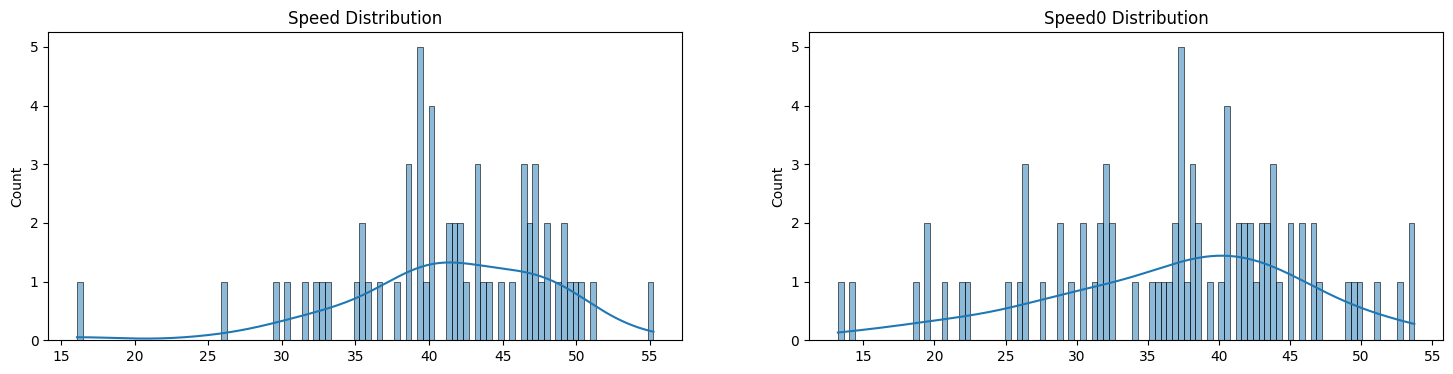

speed 41.39128985228123
speed0 36.80964964545408
ratio 1.124468454629613
speed std 6.833752177451255
speed0 std 9.03204354601754


In [7]:
import json
from transformers import AutoTokenizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tokenizer=AutoTokenizer.from_pretrained("/home/majunjie/code/weights/hf/Meta-Llama-3.1-8B-Instruct/")
# jsonl_file = "/home/majunjie/code/EAGLE/output/mt-bench/llama3.1.jsonl"
# jsonl_file = "/home/majunjie/code/EAGLE/output/mt-bench/llama3.1-d7.jsonl"
# jsonl_file_base = "/home/majunjie/code/EAGLE/output/mt-bench/llama3.1-vanilla.jsonl"
# jsonl_file = "../output/shareGPT/llama3.1/t1d7/hawkeye-33-0.004-1-0.99-speedtest-s100.jsonl"
jsonl_file = "../output/mt_bench/llama3.1/t1d7/pt/hawkeye-33-0.004-1-0.99-speedtest-s100-1.jsonl"
jsonl_file_base = "../output/mt_bench/llama3.1/t1d7/eagle3-speedtest-10.jsonl"
data = []
with open(jsonl_file, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)



speeds=[]
for datapoint in data[:8]:
    qid=datapoint["question_id"]
    for ch in datapoint["choices"]:
        answer=ch['turns']
        # tokens=sum(ch['new_tokens'])
        times = sum(ch['wall_time'])
        # speeds.append(tokens/times)
        tokens = 0
        for i in answer:
            tokens += (len(tokenizer(i).input_ids) - 1)
        times = sum(ch['wall_time'])
        speeds.append(tokens / times)
        

data = []
with open(jsonl_file_base, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)


# total_time=0
# total_token=0
speeds0=[]
for datapoint in data[:8]:
    qid=datapoint["question_id"]
    for ch in datapoint["choices"]:
        answer=ch['turns']
        # tokens=sum(ch['new_tokens'])
        times = sum(ch['wall_time'])
        # speeds0.append(tokens/times)
        tokens = 0
        for i in answer:
            tokens += (len(tokenizer(i).input_ids) - 1)
        times = sum(ch['wall_time'])
        speeds0.append(tokens / times)

#show speed and speed0 's distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
sns.histplot(speeds, bins=100, kde=True, ax=axes[0])
axes[0].set_title('Speed Distribution')
sns.histplot(speeds0, bins=100, kde=True, ax=axes[1])
axes[1].set_title('Speed0 Distribution')
plt.show()

print('speed',np.array(speeds).mean())
print('speed0',np.array(speeds0).mean())
print("ratio",np.array(speeds).mean()/np.array(speeds0).mean())

# cal std
print('speed std',np.array(speeds).std())
print('speed0 std',np.array(speeds0).std())



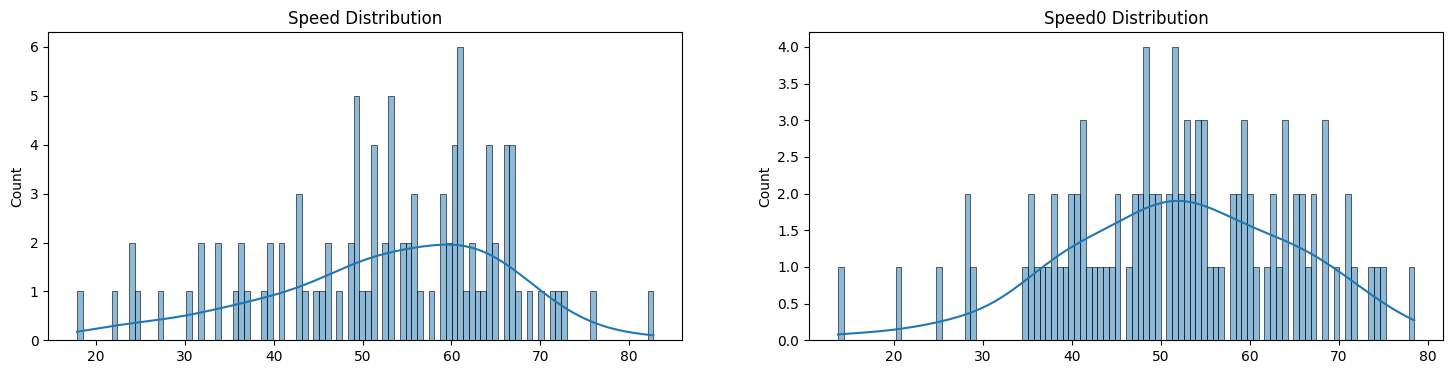

speed 52.86229757533654
speed0 51.926616681874314
ratio 1.0180192924795126
speed std 13.052647522667602
speed0 std 12.667137922773211


In [18]:
import json
from transformers import AutoTokenizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# tokenizer=AutoTokenizer.from_pretrained("/home/majunjie/code/weights/hf/Meta-Llama-3.1-8B-Instruct/")
# jsonl_file = "/home/majunjie/code/EAGLE/output/mt-bench/llama3.1.jsonl"
# jsonl_file = "/home/majunjie/code/EAGLE/output/mt-bench/llama3.1-d7.jsonl"
# jsonl_file_base = "/home/majunjie/code/EAGLE/output/mt-bench/llama3.1-vanilla.jsonl"
jsonl_file = "../output/shareGPT/llama3.1/t1d7/hawkeye-33-0.004-1-0.99-speedtest-s100.jsonl"
jsonl_file_base = "../output/shareGPT/llama3.1/t1d7/eagle3-speedtest-s100.jsonl"
data = []
with open(jsonl_file, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)



speeds=[]
for datapoint in data:
    qid=datapoint["question_id"]
    answer=datapoint["choices"][0]['turns']
    tokens=sum(datapoint["choices"][0]['new_tokens'])
    times = sum(datapoint["choices"][0]['wall_time'])
    speeds.append(tokens/times)


data = []
with open(jsonl_file_base, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)


# total_time=0
# total_token=0
speeds0=[]
for datapoint in data:
    qid=datapoint["question_id"]
    answer=datapoint["choices"][0]['turns']
    tokens=sum(datapoint["choices"][0]['new_tokens'])
    times = sum(datapoint["choices"][0]['wall_time'])
    speeds0.append(tokens/times)
    # qid=datapoint["question_id"]
    # answer=datapoint["choices"][0]['turns']
    # tokens = 0
    # for i in answer:
    #     tokens += (len(tokenizer(i).input_ids) - 1)
    # times = sum(datapoint["choices"][0]['wall_time'])
    # speeds0.append(tokens / times)
    # total_time+=times
    # total_token+=tokens

#show speed and speed0 's distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
sns.histplot(speeds, bins=100, kde=True, ax=axes[0])
axes[0].set_title('Speed Distribution')
sns.histplot(speeds0, bins=100, kde=True, ax=axes[1])
axes[1].set_title('Speed0 Distribution')
plt.show()

print('speed',np.array(speeds).mean())
print('speed0',np.array(speeds0).mean())
print("ratio",np.array(speeds).mean()/np.array(speeds0).mean())

# cal std
print('speed std',np.array(speeds).std())
print('speed0 std',np.array(speeds0).std())



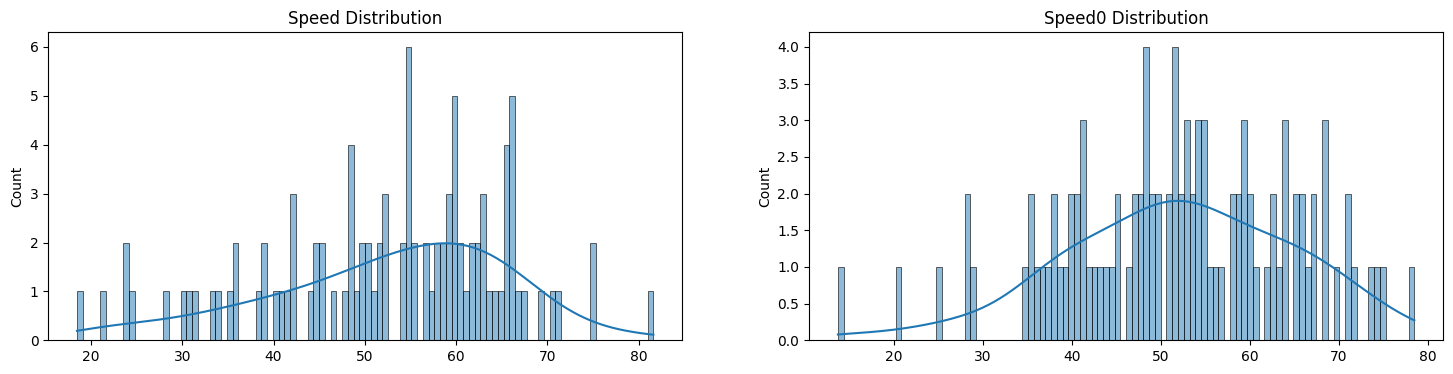

speed 52.56009528195179
speed0 51.926616681874314
ratio 1.0121994969161663
speed std 12.924188429718832
speed0 std 12.667137922773211


In [21]:
import json
from transformers import AutoTokenizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

jsonl_file = "../output/shareGPT/llama3.1/t1d7/hawkeye-33-0.004-1-0.99-speedtest-s100-1.jsonl"
jsonl_file_base = "../output/shareGPT/llama3.1/t1d7/eagle3-speedtest-s100.jsonl"
data = []
with open(jsonl_file, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)



speeds=[]
for datapoint in data:
    qid=datapoint["question_id"]
    answer=datapoint["choices"][0]['turns']
    tokens=sum(datapoint["choices"][0]['new_tokens'])
    times = sum(datapoint["choices"][0]['wall_time'])
    speeds.append(tokens/times)


data = []
with open(jsonl_file_base, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)


# total_time=0
# total_token=0
speeds0=[]
for datapoint in data:
    qid=datapoint["question_id"]
    answer=datapoint["choices"][0]['turns']
    tokens=sum(datapoint["choices"][0]['new_tokens'])
    times = sum(datapoint["choices"][0]['wall_time'])
    speeds0.append(tokens/times)
    # qid=datapoint["question_id"]
    # answer=datapoint["choices"][0]['turns']
    # tokens = 0
    # for i in answer:
    #     tokens += (len(tokenizer(i).input_ids) - 1)
    # times = sum(datapoint["choices"][0]['wall_time'])
    # speeds0.append(tokens / times)
    # total_time+=times
    # total_token+=tokens

#show speed and speed0 's distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
sns.histplot(speeds, bins=100, kde=True, ax=axes[0])
axes[0].set_title('Speed Distribution')
sns.histplot(speeds0, bins=100, kde=True, ax=axes[1])
axes[1].set_title('Speed0 Distribution')
plt.show()

print('speed',np.array(speeds).mean())
print('speed0',np.array(speeds0).mean())
print("ratio",np.array(speeds).mean()/np.array(speeds0).mean())

# cal std
print('speed std',np.array(speeds).std())
print('speed0 std',np.array(speeds0).std())



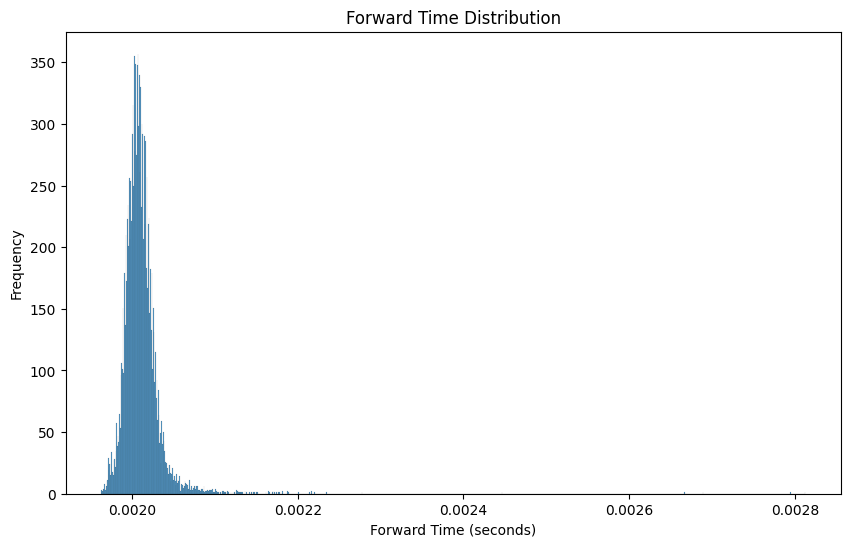

Forward time mean: 0.002010541945108639
Forward time std: 2.394567712875313e-05
Forward time max: 0.0028128623962402344
Forward time min: 0.001962423324584961
Forward time median: 0.0020079612731933594


In [2]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

jsonl_file = "../output/shareGPT/llama3.1/t1d7/eagle3-forward-time.jsonl"
data = []
with open(jsonl_file, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)

forward_times = []
for datapoint in data:
    for tl in datapoint["choices"]:
        forward_times.extend(tl)

plt.figure(figsize=(10, 6))
plt.title("Forward Time Distribution")
plt.xlabel("Forward Time (seconds)")
plt.ylabel("Frequency")
sns.histplot(forward_times, bins=1000)

plt.show()

print("Forward time mean:", np.mean(forward_times))
print("Forward time std:", np.std(forward_times))
print("Forward time max:", np.max(forward_times))
print("Forward time min:", np.min(forward_times))
print("Forward time median:", np.median(forward_times))
    

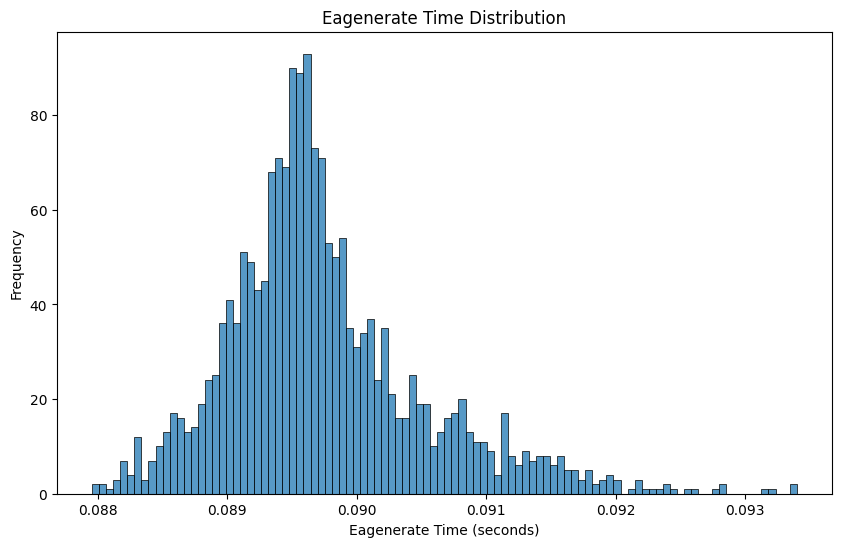

Eagenerate time mean: 0.08974500562111017
Eagenerate time std: 0.0007746877168179826
Eagenerate time max: 0.09339761734008789
Eagenerate time min: 0.08795738220214844
Eagenerate time median: 0.0896143913269043


In [5]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

jsonl_file = "../output/shareGPT/llama3.1/t1d7/eagle3-eagen-time.jsonl"
data = []
with open(jsonl_file, 'r', encoding='utf-8') as file:
    for line in file:
        json_obj = json.loads(line)
        data.append(json_obj)

eagenerate_time = []
for datapoint in data:
    eagenerate_time.extend(datapoint["choices"])

plt.figure(figsize=(10, 6))
plt.title("Eagenerate Time Distribution")
plt.xlabel("Eagenerate Time (seconds)")
plt.ylabel("Frequency")
sns.histplot(eagenerate_time, bins=100)

plt.show()

print("Eagenerate time mean:", np.mean(eagenerate_time))
print("Eagenerate time std:", np.std(eagenerate_time))
print("Eagenerate time max:", np.max(eagenerate_time))
print("Eagenerate time min:", np.min(eagenerate_time))
print("Eagenerate time median:", np.median(eagenerate_time))
    

In [6]:
public_time = np.mean(eagenerate_time) - 7 * np.mean(forward_times)
single_forward_time = np.mean(forward_times)

In [7]:
public_time

0.0756712120053497

In [8]:
single_forward_time

0.002010541945108639

In [9]:
public_time / single_forward_time

37.637221242484856